Problem Statement: 

Forecast future trends or values based on historical data. You can use time series models like ARIMA or Prophet and evaluate the model using metrics like RMSE or MAE.
(For this problem statement I have used yahoo_stock.csv dataset from kaggle to do time series forecasting.)

1. Data Preprocessing

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
yahoo_stock_data = pd.read_csv("C:\\Users\\King\\Desktop\\Cipherbyte Internship\\yahoo_stock.csv")
yahoo_stock_data.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
0,23-11-2015,2095.610107,2081.389893,2089.409912,2086.590088,3587980000,2086.590088
1,24-11-2015,2094.120117,2070.290039,2084.419922,2089.139893,3884930000,2089.139893
2,25-11-2015,2093.000000,2086.300049,2089.300049,2088.870117,2852940000,2088.870117
3,26-11-2015,2093.000000,2086.300049,2089.300049,2088.870117,2852940000,2088.870117
4,27-11-2015,2093.290039,2084.129883,2088.820068,2090.110107,1466840000,2090.110107
5,28-11-2015,2093.290039,2084.129883,2088.820068,2090.110107,1466840000,2090.110107
6,29-11-2015,2093.290039,2084.129883,2088.820068,2090.110107,1466840000,2090.110107
7,30-11-2015,2093.810059,2080.409912,2090.949951,2080.409912,4275030000,2080.409912
8,01-12-2015,2103.370117,2082.929932,2082.929932,2102.629883,3712120000,2102.629883
9,02-12-2015,2104.270020,2077.110107,2101.709961,2079.510010,3950640000,2079.510010


In [2]:
# Check for missing values and handle them 
yahoo_stock_data.fillna(method='ffill', inplace=True)

# Convert the 'Date' column to datetime format
yahoo_stock_data['Date'] = pd.to_datetime(yahoo_stock_data['Date'])


C:\Users\King\AppData\Local\Temp\ipykernel_2816\3743804129.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  yahoo_stock_data.fillna(method='ffill', inplace=True)
C:\Users\King\AppData\Local\Temp\ipykernel_2816\3743804129.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  yahoo_stock_data['Date'] = pd.to_datetime(yahoo_stock_data['Date'])


2. Feature Engineering

In [3]:
# Extracting features like day of the week, month, etc.
yahoo_stock_data['DayOfWeek'] = yahoo_stock_data['Date'].dt.dayofweek
yahoo_stock_data['Month'] = yahoo_stock_data['Date'].dt.month
yahoo_stock_data

,Date,High,Low,Open,Close,Volume,Adj Close,DayOfWeek,Month
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3587980000,2086.590088,0,11
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3884930000,2089.139893,1,11
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2852940000,2088.870117,2,11
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2852940000,2088.870117,3,11
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1466840000,2090.110107,4,11
...,...,...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5281980000,3626.909912,0,11
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4799570000,3609.530029,1,11
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5274450000,3567.790039,2,11
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4347200000,3581.870117,3,11


3. Splitting the data

In [4]:
# Split the data into training and testing sets
train_data = yahoo_stock_data.iloc[:int(0.8*len(yahoo_stock_data))]
test_data = yahoo_stock_data.iloc[int(0.8*len(yahoo_stock_data)):]

4. Model Training and Selection

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model to the training data
model = ARIMA(train_data['Close'], order=(5,1,0))
model_fit = model.fit()

5. Model Evaluation

In [6]:
# Make predictions on the testing data
predictions = model_fit.forecast(steps=len(test_data))

# Calculate RMSE (Root Mean Squared Error)
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_data['Close'], predictions))
print("RMSE:", rmse)


RMSE: 278.60489084527984


6. visualiztion

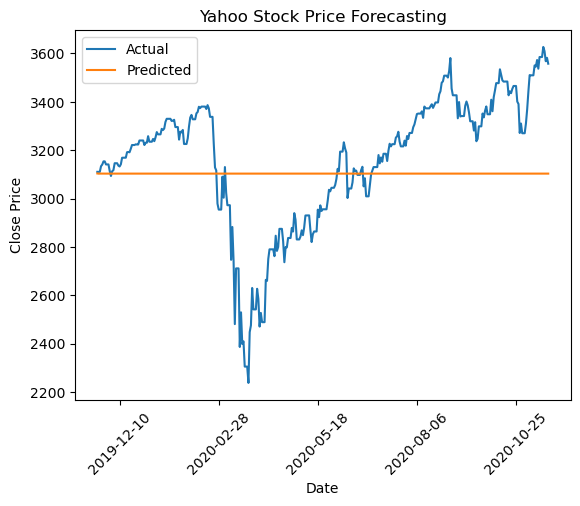

In [7]:
plt.plot(test_data['Date'], test_data['Close'], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Yahoo Stock Price Forecasting')
plt.legend()

# Add xticks for better readability
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))
plt.show()

7. Forecasting

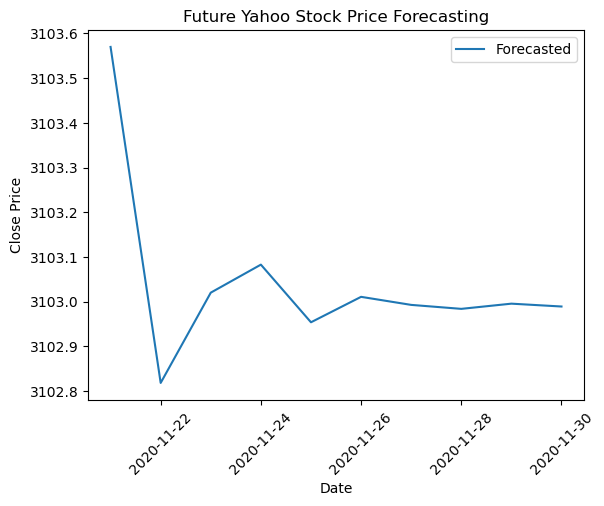

In [8]:
# Forecast future values
forecast_steps = 10
future_dates = pd.date_range(start=yahoo_stock_data['Date'].iloc[-1], periods=forecast_steps + 1, freq='D')[1:]
future_predictions = model_fit.forecast(steps=forecast_steps)

# Visualize future predictions
plt.plot(future_dates, future_predictions, label='Forecasted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Future Yahoo Stock Price Forecasting')
plt.legend()

# Add xticks for better readability
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))
plt.show()

8. Parameter Tuning

In [9]:
import itertools

# Define the range of hyperparameters to search
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
parameters = list(itertools.product(p_values, d_values, q_values))

best_rmse = float('inf')
best_params = None

# Iterate over all combinations of hyperparameters
for param in parameters:
    try:
        model = ARIMA(train_data['Close'], order=param)
        model_fit = model.fit()

        # Make predictions on the testing data
        predictions = model_fit.forecast(steps=len(test_data))

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(test_data['Close'], predictions))

        # Update best parameters if RMSE is lower
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = param
    except:
        continue

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)


C:\Users\King\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\King\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best Parameters: (1, 2, 2)
Best RMSE: 260.1544946036035


9. Model Validation

In [10]:
# Split the data into training, validation, and testing sets
train_data = yahoo_stock_data.iloc[:int(0.6*len(yahoo_stock_data))]
val_data = yahoo_stock_data.iloc[int(0.6*len(yahoo_stock_data)):int(0.8*len(yahoo_stock_data))]
test_data = yahoo_stock_data.iloc[int(0.8*len(yahoo_stock_data)):]

# Fit the model to the training data with the best parameters
model = ARIMA(train_data['Close'], order=best_params)
model_fit = model.fit()

# Make predictions on the validation data
val_predictions = model_fit.forecast(steps=len(val_data))

# Calculate RMSE on the validation data
val_rmse = np.sqrt(mean_squared_error(val_data['Close'], val_predictions))
print("Validation RMSE:", val_rmse)

# Make predictions on the testing data
test_predictions = model_fit.forecast(steps=len(test_data))

# Calculate RMSE on the testing data
test_rmse = np.sqrt(mean_squared_error(test_data['Close'], test_predictions))
print("Testing RMSE:", test_rmse)


Validation RMSE: 155.27670582389743
Testing RMSE: 488.6956696872334
